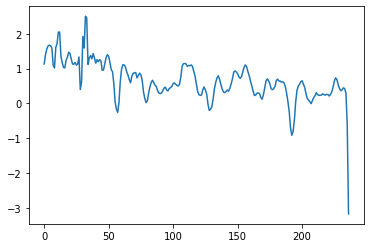

In [38]:
#Importation
import pandas as pd
import matplotlib.pyplot  as plt
import Traitement as tr
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error
from math import sqrt

#Nous récupérons les données pour la france
data = pd.read_csv('data.csv', sep=';')
df_fra = data[data['LOCATION'] == "FRA"]
gpy, gpp, ind = tr.traitementParPays(df_fra, 'Q')
#Nous récupérons les valeurs des moyennes mobiles
data = pd.DataFrame(tr.mobilMoy(gpp,4)[0], columns=['id','date','valeur'])
data["valeur"].plot()
plt.show()

predicted=0.118538, expected=-0.006524
predicted=0.053193, expected=0.084621
predicted=0.183654, expected=0.170376
predicted=0.240481, expected=0.218263
predicted=0.349135, expected=0.309081
predicted=0.332231, expected=0.254027
predicted=0.215064, expected=0.230778
predicted=0.279898, expected=0.237187
predicted=0.207859, expected=0.239988
predicted=0.307115, expected=0.274570
predicted=0.280501, expected=0.250958
predicted=0.260195, expected=0.239126
predicted=0.241814, expected=0.259394
predicted=0.283450, expected=0.255180
predicted=0.306029, expected=0.214333
predicted=0.219843, expected=0.258603
predicted=0.299350, expected=0.331345
predicted=0.352607, expected=0.465280
predicted=0.579720, expected=0.643698
predicted=0.673032, expected=0.735601
predicted=0.735161, expected=0.684773
predicted=0.609377, expected=0.535700
predicted=0.433396, expected=0.429416
predicted=0.368603, expected=0.363736
predicted=0.363737, expected=0.389665
predicted=0.466778, expected=0.446788
predicted=0

c:\users\loicv\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\ar_model.py:248: FutureWarning: The parameter names will change after 0.12 is released. Set old_names to False to use the new names now. Set old_names to True to use the old names. 
  warnings.warn(


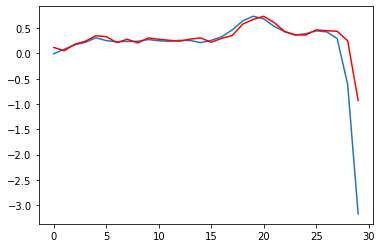

In [37]:
X = data['valeur']
train, test = X[1:len(X)-30], X[len(X)-30:]
window = 10
model = AutoReg(train, lags=10)
model_fit = model.fit()
coef = model_fit.params
history = train[len(train)-window:]
history = list(history)
history = [history[i] for i in range(len(history))]
predictions = list()
test = list(test)
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

Le test RMSE est faible, ce qui montre que le modèle est correcte

c:\users\loicv\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


predicted=1.067673, expected=1.105258
predicted=1.083450, expected=1.049842
predicted=0.967231, expected=0.910506
predicted=0.833405, expected=0.791387
predicted=0.753290, expected=0.638518
predicted=0.631103, expected=0.496978
predicted=0.539852, expected=0.356722
predicted=0.363294, expected=0.225447
predicted=0.257754, expected=0.242980
predicted=0.306229, expected=0.293581
predicted=0.333273, expected=0.303256
predicted=0.351667, expected=0.283216
predicted=0.250297, expected=0.169432
predicted=0.106077, expected=0.120125
predicted=0.121938, expected=0.252403
predicted=0.284594, expected=0.440642
predicted=0.514577, expected=0.645764
predicted=0.701940, expected=0.705055
predicted=0.623253, expected=0.651601
predicted=0.567427, expected=0.565415
predicted=0.462614, expected=0.423962
predicted=0.377215, expected=0.393488
predicted=0.435021, expected=0.424808
predicted=0.448878, expected=0.491384
predicted=0.566467, expected=0.658460
predicted=0.694839, expected=0.698525
predicted=0.

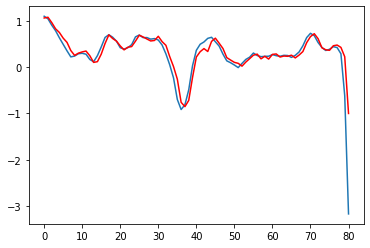

In [43]:
X = data['valeur']
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
train = list(train)
test = list(test)
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % error)
# plot
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()